<a href="https://colab.research.google.com/github/Nawapon19/NLP-Practice/blob/main/Flipkart_Reviews_Sentiment_Analysis_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Flipkart Reviews Sentiment Analysis**

The analysis of the reviews and ratings user gives on Flipkart to make others aware of their experience and moreover about the quality of the product and brand.

The task is to predict whether the review given is positive or negative.

**Importing Libraries and Datasets**

In [20]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from wordcloud import WordCloud
from nltk.corpus import stopwords
from tqdm import tqdm # Instantly make loops show a smart progress meter

nltk.download('stopwords')
nltk.download('punkt')

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
# load dataset to pandas dataframe
data = pd.read_csv('flipkart_data.csv')

data.head()

,review,rating
0,It was nice produt. I like it's design a lot. ...,5
1,awesome sound....very pretty to see this nd th...,5
2,awesome sound quality. pros 7-8 hrs of battery...,4
3,I think it is such a good product not only as ...,5
4,awesome bass sound quality very good bettary l...,5


**Preprocessing and cleaning the reviews**

In [3]:
# find unique ratings
pd.unique(data['rating'])

array([5, 4, 1, 3, 2])

<Axes: xlabel='rating', ylabel='count'>

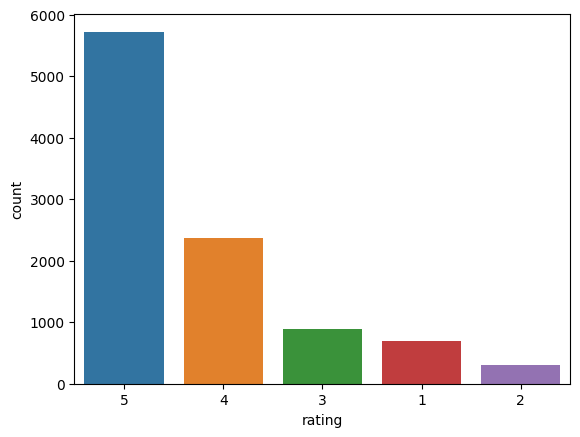

In [4]:
# plot countplot for ratings
sns.countplot(data = data, x = 'rating', order = data.rating.value_counts().index)

To predict the Sentiment as positive(numerical value = 1) or negative(numerical value = 0):
* change the rating column into an another column of 0s and 1s category
* the condition will be like if the rating is less than or equal to 4, then it is negative(0) else positive(1)

In [5]:
# create a list for labeled data
pos_neg = []

# label data with condition if rating >= 5 -> 1, else 0
for i in range(len(data['rating'])):
  if data['rating'][i] >= 5:
    pos_neg.append(1)
  else:
    pos_neg.append(0)

# create new column for labels
data['label'] = pos_neg

data.head()

,review,rating,label
0,It was nice produt. I like it's design a lot. ...,5,1
1,awesome sound....very pretty to see this nd th...,5,1
2,awesome sound quality. pros 7-8 hrs of battery...,4,0
3,I think it is such a good product not only as ...,5,1
4,awesome bass sound quality very good bettary l...,5,1


In [7]:
# create a function to preprocess the data
def preprocess_text(text_data):
  preprocessed_text = []

  for sentence in tqdm(text_data):
    # remove punctuations
    sentence = re.sub(r'[^\w\s]', '', sentence)

    # convert lowercase and remove stopwords
    preprocessed_text.append(' '.join(token.lower()
    for token in nltk.word_tokenize(sentence)
    if token.lower() not in stopwords.words('english')))

  return preprocessed_text

In [10]:
# apply the function to the dataset
preprocessed_review = preprocess_text(data['review'].values)
data['review'] = preprocessed_review

data.head()

100%|██████████| 9976/9976 [00:21<00:00, 460.82it/s]


,review,rating,label
0,nice produt like design lot easy carry looked ...,5,1
1,awesome soundvery pretty see nd sound quality ...,5,1
2,awesome sound quality pros 78 hrs battery life...,4,0
3,think good product per quality also design qui...,5,1
4,awesome bass sound quality good bettary long l...,5,1


**Analysis of the Dataset**

In [11]:
# checkhow many counts are there for positive and negative sentiments
data['label'].value_counts()

1    5726
0    4250
Name: label, dtype: int64

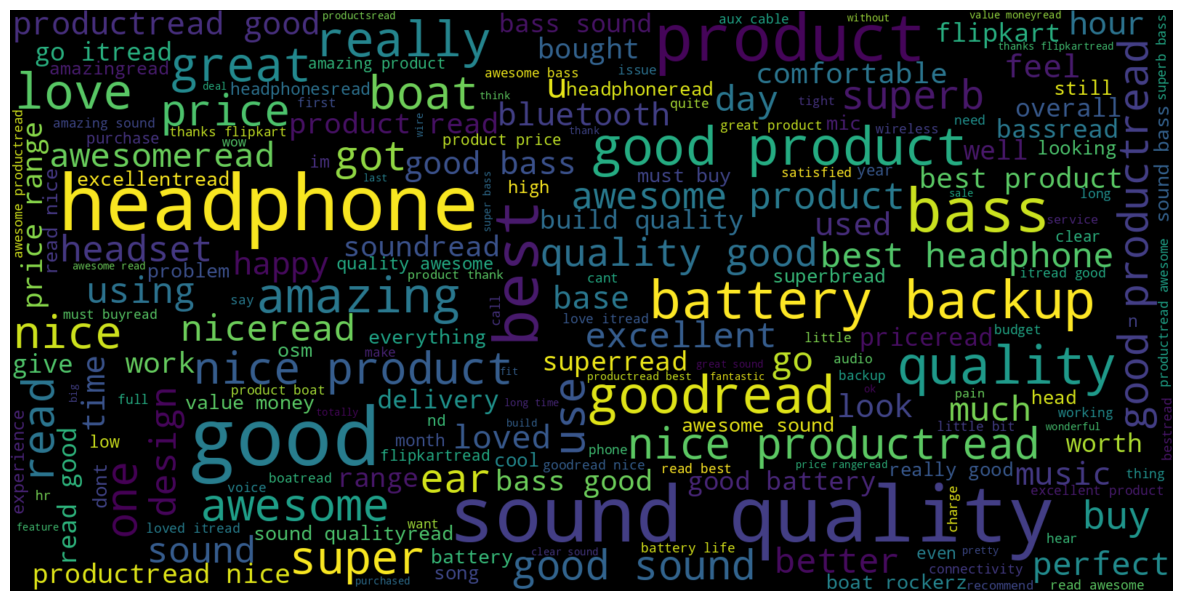

In [12]:
# create the Wordcloud of all the words with label = 1, positive reviews
# to have the better picture of the importance of the words

# create a consolidated string of all words
consolidated = ' '.join(
    word for word in data['review'][data['label'] == 1].astype(str)
)

# create a wordcloud object
wordCloud = WordCloud(width = 1600, height = 800, random_state = 21, max_font_size = 110)

# plot wordcloud using matplotlib
plt.figure(figsize = (15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation = 'bilinear')
plt.axis('off')
plt.show()

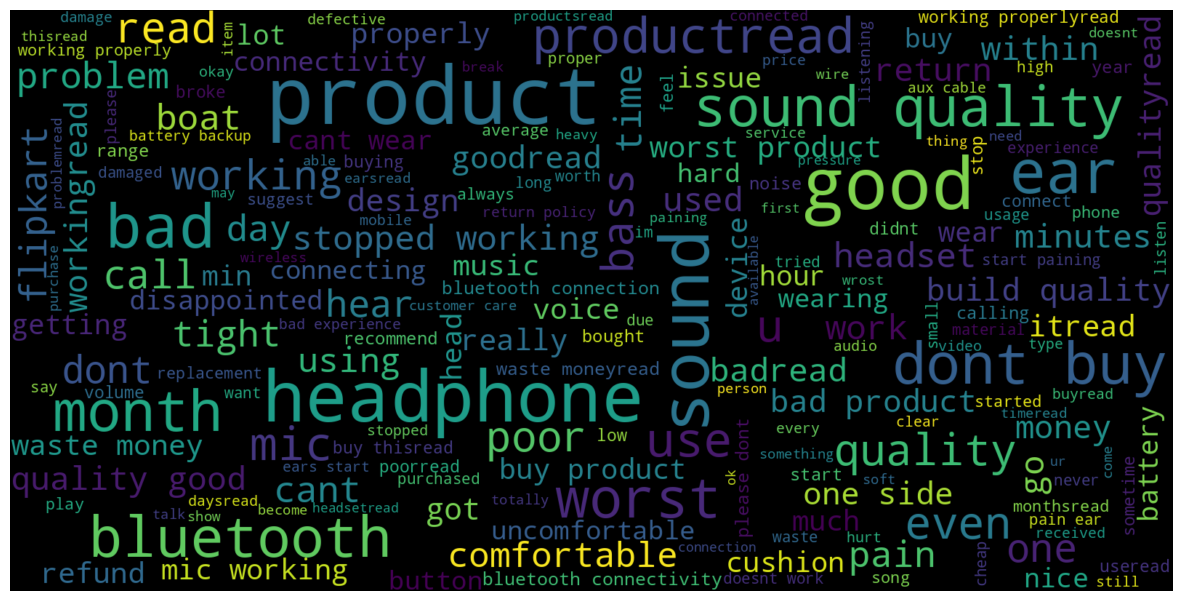

In [17]:
# create wordcloud for the rating 1
consolidated = ' '.join(
    word for word in data['review'][data['rating'] == 1].astype(str)
)

plt.figure(figsize = (15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation = 'bilinear')
plt.axis('off')
plt.show()

**Converting text into Vectors**

TF-IDF calculates that how relevant a word in a series or corpus is to a text. The meaning increases proportionally to the number of times in the text a word appears but is compensated by the word frequency in the corpus (data-set).

In [18]:
# create TF-IDF object and use it to tansform review texts
tfidf = TfidfVectorizer(max_features = 2500)

X = tfidf.fit_transform(data['review']).toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

**Model training, Evaluation, and Prediction**

In [21]:
# split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, data['label'],
                                                    test_size = 0.33,
                                                    stratify = data['label'], # preserves the same proportions of examples in each class
                                                    random_state = 42)

In [23]:
# build and train decision tree model
model = DecisionTreeClassifier(random_state = 0)
model.fit(X_train, y_train)

# test accuracy of the model
pred = model.predict(X_train)
print(metrics.accuracy_score(y_train, pred))

0.9247344007182403


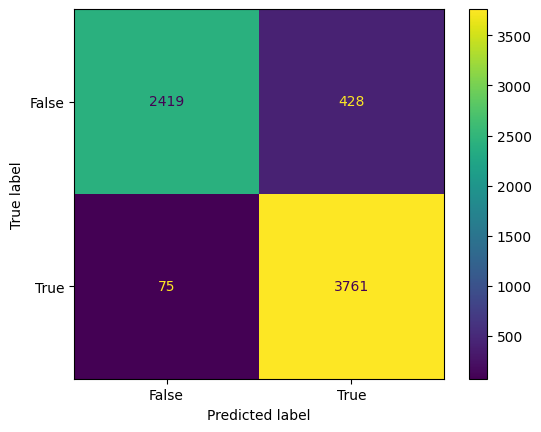

In [24]:
# display confusion matrix for prediction of training set
cm = metrics.confusion_matrix(y_train, pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,
                                            display_labels = [False, True])

cm_display.plot()
plt.show()

In [25]:
# test accuracy of the model on testing set
pred = model.predict(X_test)
print(metrics.accuracy_score(y_test, pred))

0.6771940479805648


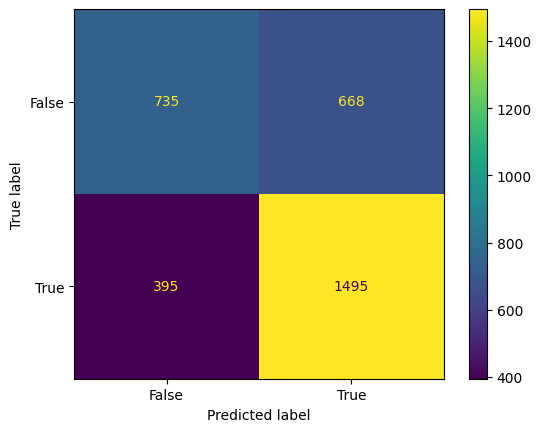

In [26]:
# display confusion matrix for prediction of testing set
cm = metrics.confusion_matrix(y_test, pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,
                                            display_labels = [False, True])

cm_display.plot()
plt.show()

In [30]:
pred = model.predict(X_train)
print("Training score: \nAccuracy score: {} \nPrecision score: {} \nRecall score: {} \nF-1 score: {}".format(
metrics.accuracy_score(y_train, pred),
metrics.precision_score(y_train, pred),
metrics.recall_score(y_train, pred),
metrics.f1_score(y_train, pred))
)

pred = model.predict(X_test)
print("\nTesting score: \nAccuracy score: {} \nPrecision score: {} \nRecall score: {} \nF-1 score: {}".format(
metrics.accuracy_score(y_test, pred),
metrics.precision_score(y_test, pred),
metrics.recall_score(y_test, pred),
metrics.f1_score(y_test, pred))
)

Training score: 
Accuracy score: 0.9247344007182403 
Precision score: 0.8978276438290762 
Recall score: 0.9804483837330553 
F-1 score: 0.9373208722741434

Testing score: 
Accuracy score: 0.6771940479805648 
Precision score: 0.691169671752196 
Recall score: 0.791005291005291 
F-1 score: 0.7377251418702195
